# Graph edges

Analysis of the relevance of the edge labels for this graph

In [1]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Update path in order to correctly resolve python modules and files
os.chdir("..")
sys.path.append("src")

In [3]:
# Local imports
from src.loader import (
    training_set,
    training_data_path,
    training_labels_path,
)  # noqa: E402

We will iterate over all edges in the training dataset to evaluate how they transfer relevance from one utterance to another.

Note: the following analysis does not take into account the fact that multiple edges with contradicting labels in terms of relevance can point to the same node, but we assume that the graph is sparse enough for this not to have an influence.

In [4]:
# Prepare data table
# This will be progressively filled with the labels
edge_label_lookup: dict[str, int] = {}
edge_labels: list[str] = []
edge_data = np.zeros((0, 4))

# Structure of the data table:
# edge_label : count of 1->1 edges : count of 1->0 edges : count of 0->1 edges : count of 0->0 edges

In [5]:
# Iterate over the data

# Open the labels
with open(training_labels_path / "training_labels.json", "r") as file:
    training_labels = json.load(file)

# Open the data
for filename in training_set:
    with open(training_data_path / f"{filename}.txt", "r") as file:
        data = np.genfromtxt(file, delimiter=" ", dtype=str)

    # Iterate over the edges
    for start, edge_label, end in data:
        # Convert node indices to integers
        start = int(start)
        end = int(end)

        # Get labels for the start and end nodes
        start_label = training_labels[filename][start]
        end_label = training_labels[filename][end]

        # Handle new edge labels
        if edge_label not in edge_label_lookup:
            edge_label_lookup[edge_label] = len(edge_label_lookup)
            edge_labels.append(edge_label)
            edge_data = np.append(edge_data, np.zeros((1, 4)), axis=0)

        # Increment the appropriate counter
        counter_index = -1
        if start_label == 1 and end_label == 1:
            counter_index = 0
        elif start_label == 1 and end_label == 0:
            counter_index = 1
        elif start_label == 0 and end_label == 1:
            counter_index = 2
        elif start_label == 0 and end_label == 0:
            counter_index = 3

        edge_data[edge_label_lookup[edge_label], counter_index] += 1

Now that we have counted this data, we can display it in the form of pie charts for each different edge label.

In [6]:
print(len(edge_labels))
print(edge_labels)

16
['Continuation', 'Explanation', 'Elaboration', 'Acknowledgement', 'Comment', 'Result', 'Question-answer_pair', 'Contrast', 'Clarification_question', 'Background', 'Narration', 'Alternation', 'Conditional', 'Q-Elab', 'Correction', 'Parallel']


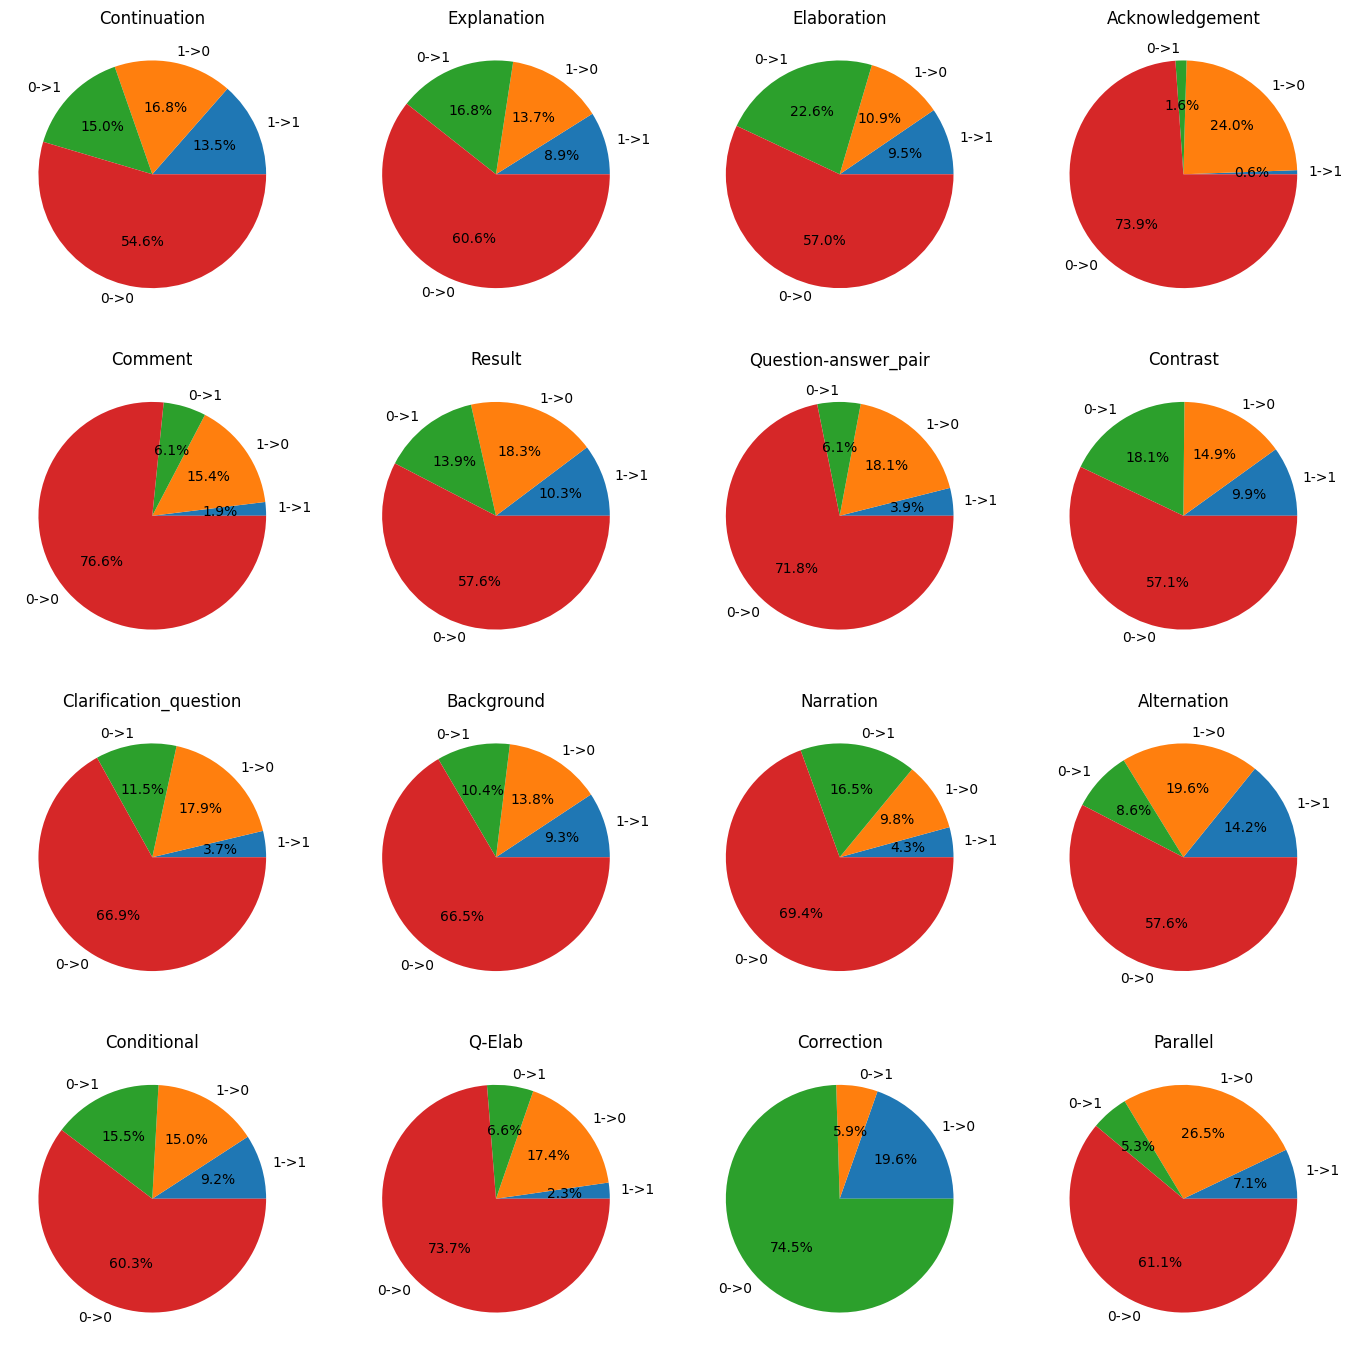

In [7]:
# There are 16 labels : we can do a 4 by 4 plot of pie charts
fig, axs = plt.subplots(4, 4, figsize=(17, 17))
pie_labels = ["1->1", "1->0", "0->1", "0->0"]

for i in range(4):
    for j in range(4):
        # Get the data for the pie chart
        data = edge_data[i * 4 + j, :]
        labels = pie_labels

        # Remove labels with no data
        labels = [label for (label, count) in zip(labels, data) if count > 0]
        data = data[data > 0]

        # Plot the pie chart
        axs[i, j].pie(data, labels=labels, autopct="%1.1f%%")
        axs[i, j].set_title(f"{i} -> {j}")
        axs[i, j].set_title(edge_labels[i * 4 + j])

plt.show()